[[ 0.9998628   0.9999975   0.99753606 ...  0.9999512   0.9999979
   0.9999153 ]
 [ 0.9943338   0.9999974   0.9999297  ... -0.98083806  0.9585665
  -0.89710945]
 [-0.99889    -0.9999995   1.         ... -0.99847794  0.99957025
  -0.9999971 ]
 ...
 [-0.9999979   0.9786587  -0.99979115 ... -0.9182969  -0.7849658
  -0.9990638 ]
 [-0.99861693  0.99998516  0.9785285  ...  0.999975    0.97029305
   0.99999857]
 [ 0.999984    0.99940383  0.9999991  ...  0.9999996   0.9999996
   0.9999999 ]]
2024-07-15 09:46:37,102 [INFO] normalizing data across axis=1
2024-07-15 09:46:37,104 [INFO] projecting out mean along axis=0
2024-07-15 09:46:37,106 [INFO] data normalized, 0.00sec
2024-07-15 09:46:37,106 [INFO] sorting activity: 64 valid samples by 1200 timepoints
2024-07-15 09:46:37,140 [INFO] n_PCs = 10 computed, 0.04sec
2024-07-15 09:46:37,157 [INFO] 5 clusters computed, time 0.05sec
2024-07-15 09:46:37,172 [INFO] clusters sorted, time 0.07sec
2024-07-15 09:46:37,200 [INFO] clusters upsampled, time 0.1

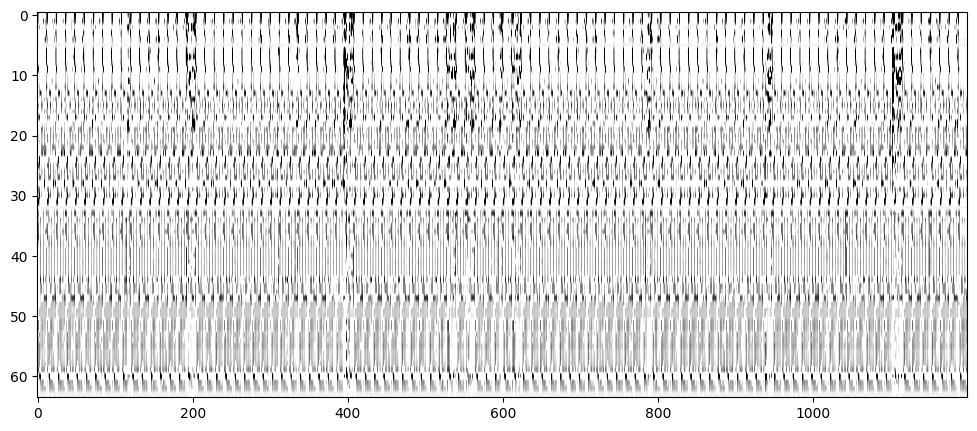

In [2]:
import numpy as np

hids=np.load("pcs.npy")

import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap, utils
from scipy.stats import zscore

# spks is neurons by time
#spks = np.load("spks.npy").astype("float32")
#spks=np.where(np.isnan(hids)==True)
spks=hids.T
print(spks)
spks = zscore(spks, axis=1)
bin_size=10

# fit rastermap
model = Rastermap(n_PCs=10, n_clusters=5, 
                  locality=0.75, time_lag_window=5).fit(spks, compute_X_embedding=True)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

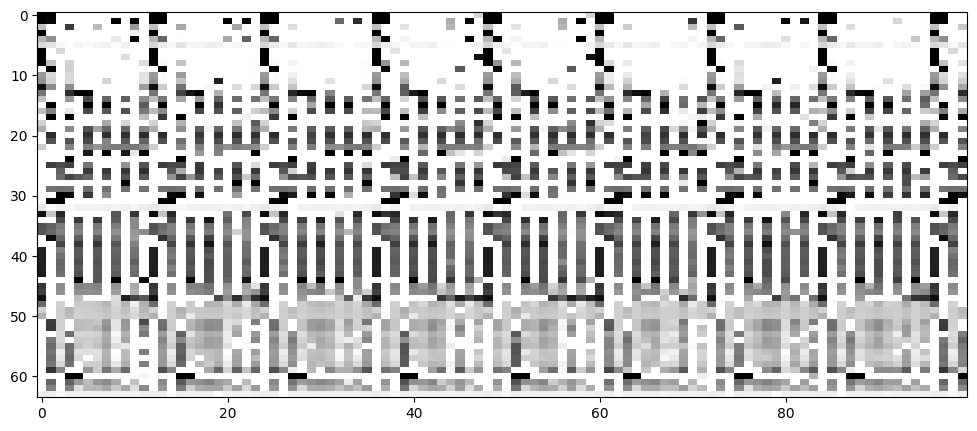

In [4]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding[:,:100], vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")